# Urban Mobility vs Economic Productivity (LATAM, 2024)
**Portfolio Project (Python / Pandas / Matplotlib)**  
**Role:** Data Analyst — Latin American Development Bank (simulated scenario)

## Objective

This analysis evaluates the relationship between **urban mobility** (traffic congestion and travel delays) and **economic productivity** (GDP per capita) across major Latin American cities in **2024**.  
The main goal is to assess whether high congestion is associated with lower productivity, supporting infrastructure investment decisions.

## Business Questions

1) Which Latin American cities show **high congestion** and **low economic productivity**?  
2) Which cities show the **best combined indicators** (efficient mobility and strong economic performance)?  
3) Which mobility variables appear most strongly related to **urban development outcomes** (GDP per capita, unemployment, and air quality)?




## Executive Summary

This analysis assesses the relationship between urban mobility—measured through traffic congestion and travel times—and economic productivity—represented by GDP per capita—in Latin American cities during 2024. The goal is to determine whether high congestion is associated with lower productivity, helping prioritize transport infrastructure investments.

The dataset covers **15 cities across 7 LATAM countries** (Brazil, Colombia, Argentina, Peru, Mexico, Uruguay, and Chile) using aggregated TomTom traffic indicators and OECD city-level economic data. A cleaned and unified city–year table was built for 2024 using standardized formats and an INNER join to ensure complete records across sources.

Results suggest there is **no strong linear relationship** between GDP per capita and congestion overall, but specific cities show critical patterns. **Bogotá** and **Lima** combine very high congestion (JamsDelay ≈ **1141.6** and **1052.3**) with relatively low GDP per capita (≈ **11.44** and **13.47**). In contrast, **Buenos Aires** shows moderate-to-high congestion but a higher GDP per capita, suggesting stronger economic capacity to absorb mobility inefficiencies.

Recommendation: prioritize **Bogotá** as the highest-risk case for targeted investment, with **Lima** as a second priority. Further work should validate outliers and expand the analysis using formal correlations and multi-year trends, including the role of public transport.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Load cleaned dataset
df = pd.read_csv("ladb_mobility_economy_2024_clean.csv")

# Display basic information
df.head(), df.shape


(             city country  year    jamsdelay  trafficindexlive  \
 0  belo-horizonte     BRA  2024   263.047879         19.428946   
 1          bogota     COL  2024  1141.552364         37.614273   
 2        brasilia     BRA  2024   101.576326         11.258220   
 3    buenos-aires     ARG  2024   571.089593         17.756012   
 4        curitiba     BRA  2024   183.469274         14.954545   
 
    jamslengthinkms   jamscount  minsdelay  traveltimeliveper10kmsmins  \
 0        44.038129   68.805422   0.487228                   18.304538   
 1       140.893564  230.566550   1.699628                   24.992185   
 2        18.337133   27.280140   0.193442                   13.338658   
 3       100.287844  137.359860   0.416566                   17.907916   
 4        30.050044   46.898164   0.139965                   17.258700   
 
    traveltimehistoricper10kmsmins  city_gdp_capita  unemployment_percent  \
 0                       17.817311           11.124                   9.5

## Dataset Overview

This unified dataset contains one row per city for the year 2024, combining
urban mobility indicators with economic and environmental variables.

Before proceeding with the analysis, I validate the dataset structure,
data types, and check for missing values to ensure the data is reliable
and ready for exploratory analysis.


## Data Validation and Initial Exploration

Before performing the analysis, I validate the structure and quality of the dataset.
This step ensures that the data types are correct, the values are within reasonable
ranges, and there are no missing values that could bias the results.


In [3]:
# Dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            15 non-null     object 
 1   country                         15 non-null     object 
 2   year                            15 non-null     int64  
 3   jamsdelay                       15 non-null     float64
 4   trafficindexlive                15 non-null     float64
 5   jamslengthinkms                 15 non-null     float64
 6   jamscount                       15 non-null     float64
 7   minsdelay                       15 non-null     float64
 8   traveltimeliveper10kmsmins      15 non-null     float64
 9   traveltimehistoricper10kmsmins  15 non-null     float64
 10  city_gdp_capita                 15 non-null     float64
 11  unemployment_percent            15 non-null     float64
 12  pm2.5_ug_m3                     15 non

In [4]:
# Descriptive statistics for numerical variables
df.describe()


,year,jamsdelay,trafficindexlive,jamslengthinkms,jamscount,minsdelay,traveltimeliveper10kmsmins,traveltimehistoricper10kmsmins,city_gdp_capita,unemployment_percent,population
count,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,2024.0,629.517204,22.102749,87.858914,144.324391,0.618270,19.034347,18.416077,13.253600,8.693333,9.086667e+06
std,0.0,783.063726,7.480396,105.159497,168.162789,0.618267,3.270021,2.806720,5.686214,2.259414,6.731468e+06
min,2024.0,50.201092,11.258220,6.369201,14.160332,0.072539,13.338658,13.145216,2.277000,3.200000,1.800000e+06
25%,2024.0,107.165938,17.351054,17.611311,30.250647,0.166703,17.084315,16.745914,10.156500,7.800000,4.150000e+06
50%,2024.0,263.047879,20.155352,44.038129,68.805422,0.393442,18.304538,17.817311,12.381000,8.500000,6.100000e+06
75%,2024.0,841.079053,26.020448,105.301307,183.274409,0.878235,20.451702,19.813180,15.477000,9.750000,1.250000e+07
max,2024.0,2833.057892,37.614273,389.239265,594.969392,1.855542,25.674261,24.167956,26.176000,12.400000,2.260000e+07


In [5]:
# Check for missing values
df.isna().sum()


,0
city,0
country,0
year,0
jamsdelay,0
trafficindexlive,0
jamslengthinkms,0
jamscount,0
minsdelay,0
traveltimeliveper10kmsmins,0
traveltimehistoricper10kmsmins,0


### Validation Summary

The dataset contains one row per city for the year 2024 and includes mobility,
economic, environmental, and demographic variables.

All columns present valid data types and no missing values were detected.
The numerical ranges are consistent with expected real-world values,
confirming that the dataset is clean and suitable for exploratory analysis.


## Visualizations and Relationship Analysis (2024)

In this section, I visualize key patterns in urban mobility and economic indicators.
The goal is to understand distributions, detect outliers, and compare mobility and productivity across cities.


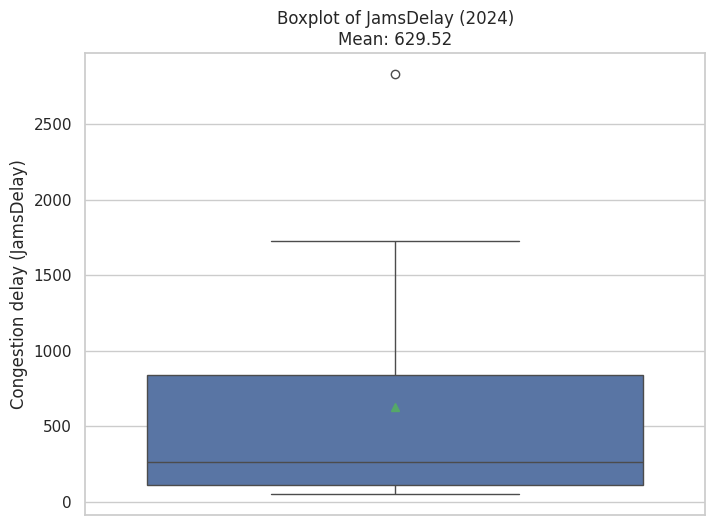

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="jamsdelay", showmeans=True)

mean_value = df["jamsdelay"].mean()
plt.title(f"Boxplot of JamsDelay (2024)\nMean: {mean_value:.2f}")
plt.ylabel("Congestion delay (JamsDelay)")
plt.show()


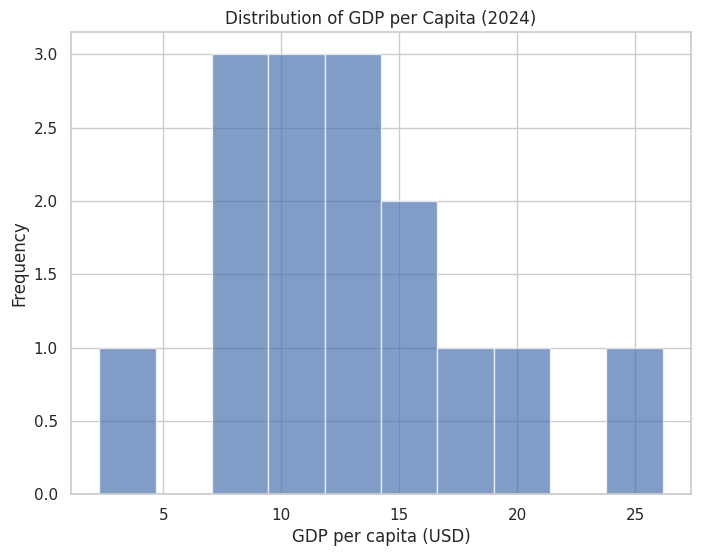

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df["city_gdp_capita"], bins=10, alpha=0.7)
plt.title("Distribution of GDP per Capita (2024)")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Frequency")
plt.show()


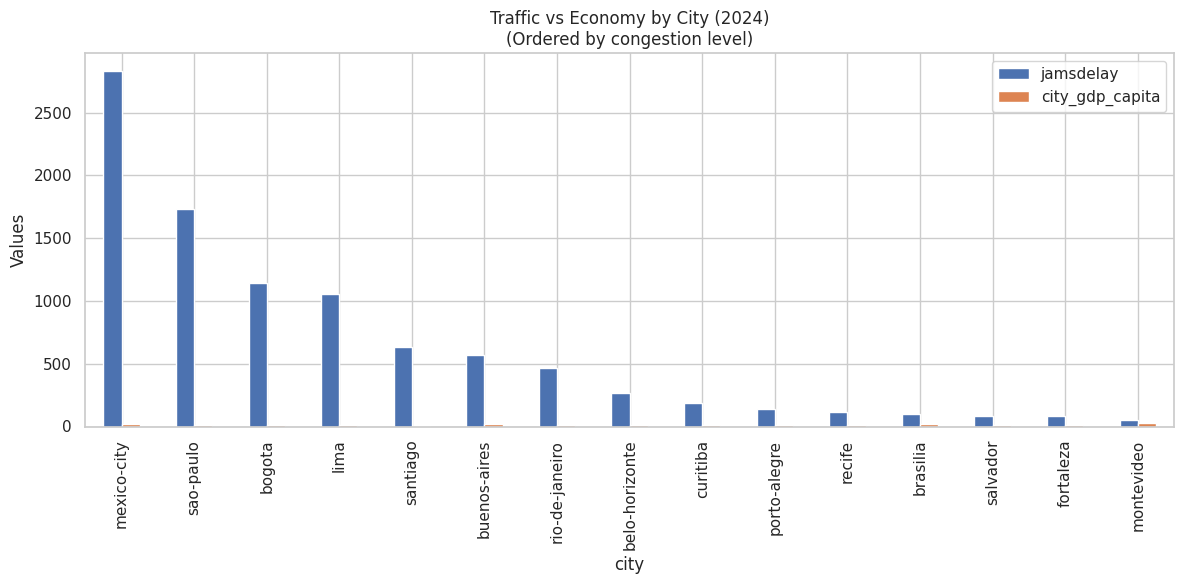

In [8]:
df_sorted = df.sort_values("jamsdelay", ascending=False)

df_sorted.plot(
    x="city",
    y=["jamsdelay", "city_gdp_capita"],
    kind="bar",
    figsize=(12, 6)
)

plt.xticks(rotation=90)
plt.title("Traffic vs Economy by City (2024)\n(Ordered by congestion level)")
plt.ylabel("Values")
plt.tight_layout()
plt.show()


## Business Questions — Results (2024)

Below I summarize the results to directly answer the three business questions using city-level comparisons and simple rankings based on congestion (JamsDelay, TrafficIndexLive) and productivity (GDP per capita).


In [9]:
# Ensure PM2.5 is numeric (it is currently read as text with commas)
df["pm2.5_ug_m3"] = df["pm2.5_ug_m3"].astype(str).str.replace(",", ".", regex=False).astype(float)

# Q1: High congestion + low productivity (top candidates)
q1 = (
    df.assign(
        congestion_rank=df["jamsdelay"].rank(ascending=False),
        low_gdp_rank=df["city_gdp_capita"].rank(ascending=True)
    )
    .assign(risk_score=lambda x: x["congestion_rank"] + x["low_gdp_rank"])
    .sort_values("risk_score", ascending=True)
    [["city", "country", "jamsdelay", "trafficindexlive", "city_gdp_capita", "risk_score"]]
)

q1.head(5)


,city,country,jamsdelay,trafficindexlive,city_gdp_capita,risk_score
13,santiago,CHL,629.865318,20.155352,2.277,6.0
1,bogota,COL,1141.552364,37.614273,11.442,9.0
14,sao-paulo,BRA,1729.189270,26.877932,14.703,13.0
0,belo-horizonte,BRA,263.047879,19.428946,11.124,13.0
6,lima,PER,1052.292789,31.031277,13.472,14.0


In [10]:
# Q2: Best combined indicators = low congestion + high GDP
q2 = (
    df.assign(
        low_congestion_rank=df["jamsdelay"].rank(ascending=True),
        high_gdp_rank=df["city_gdp_capita"].rank(ascending=False)
    )
    .assign(best_score=lambda x: x["low_congestion_rank"] + x["high_gdp_rank"])
    .sort_values("best_score", ascending=True)
    [["city", "country", "jamsdelay", "trafficindexlive", "city_gdp_capita", "best_score"]]
)

q2.head(5)


,city,country,jamsdelay,trafficindexlive,city_gdp_capita,best_score
8,montevideo,URY,50.201092,17.014854,26.176,2.0
2,brasilia,BRA,101.576326,11.258220,16.251,8.0
3,buenos-aires,ARG,571.089593,17.756012,18.117,13.0
4,curitiba,BRA,183.469274,14.954545,12.381,15.0
9,porto-alegre,BRA,139.382830,17.687254,11.801,15.0


In [11]:
# Q3: exploratory correlations (not causal)
vars_mobility = ["jamsdelay", "trafficindexlive", "minsdelay", "traveltimeliveper10kmsmins"]
vars_outcomes = ["city_gdp_capita", "unemployment_percent", "pm2.5_ug_m3"]

corr_table = df[vars_mobility + vars_outcomes].corr(numeric_only=True)
corr_table.loc[vars_mobility, vars_outcomes].sort_values("city_gdp_capita")


,city_gdp_capita,unemployment_percent,pm2.5_ug_m3
trafficindexlive,0.056001,-0.293692,0.630863
traveltimeliveper10kmsmins,0.091659,-0.185823,0.443928
minsdelay,0.237215,-0.592742,0.643116
jamsdelay,0.282975,-0.686956,0.767783


## Key Insights

- There is no strong linear relationship between congestion and GDP per capita across all cities, but specific cases show critical patterns.

- **Bogotá** (JamsDelay ≈ 1141.6; GDP/capita ≈ 11.44) and **Lima** (JamsDelay ≈ 1052.3; GDP/capita ≈ 13.47) stand out as high-congestion / lower-productivity cities and should be considered priority candidates for intervention.

- **Buenos Aires** shows moderate-to-high congestion but higher GDP per capita, suggesting stronger economic capacity to absorb mobility inefficiency.

- Congestion distributions show strong outliers (boxplot), reinforcing the need to validate extreme values and examine city-specific mobility conditions.


## Limitations

- Single-year snapshot (2024) limits trend analysis and does not establish causality.
- Small sample (15 cities) means results should be interpreted as exploratory.
- GDP per capita is a proxy and may not capture informal activity or inequality.
- Public transport quality and policy variables are not included and likely explain city differences.


## Recommendations and Next Steps

- Prioritize **Bogotá** as the highest-risk case for targeted transport investment; consider **Lima** as a second priority.
- Validate extreme congestion values (outlier checks) and confirm consistency of city-level measures.
- Add multi-year data and formal statistical correlation tests to strengthen evidence.
- Expand the analysis with public transport variables and policy indicators to understand what reduces congestion effectively.



## Conclusion

This project assessed how urban mobility (congestion and travel delays) relates to economic productivity across 15 Latin American cities in 2024. While the overall relationship between congestion and GDP per capita is not strongly linear, specific cities—especially **Bogotá and Lima**—combine very high congestion with relatively low productivity, making them priority candidates for mobility investment.

The results support targeted, city-specific interventions rather than one-size-fits-all approaches and highlight the need for multi-year analysis and stronger statistical validation to guide infrastructure decisions.

